# Neural network

In [6]:
import os
import sys
sys.path.append("..")
import cv2

# Import teaching utils
import numpy as np
from imutils import jimshow as show 
from imutils import jimshow_channel as show_channel

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import matplotlib.pyplot as plt

# Import dataset
from tensorflow.keras.datasets import cifar10

In [7]:
#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [8]:
X_list_train = []

for image in X_train:
    X_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_normalized = X_grey/255
    X_list_train.append(X_normalized)

X_train_final = np.array(X_list).reshape(-1, 1024)

In [9]:
X_list_test = []

for image in X_test:
    X_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_normalized = X_grey/255
    X_list_test.append(X_normalized)

X_test_final = np.array(X_list).reshape(-1, 1024)

In [10]:
X_train_final.shape

(50000, 1024)

In [11]:
p

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
classifierMLP = MLPClassifier(activation = "logistic",
                           hidden_layer_sizes = (2,),
                           max_iter=1000,
                           random_state = 42).fit(X_train_final, y_train)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [14]:
y_pred = classifierLogistic.predict(X_test_final)

In [15]:
y_pred = classifierMLP.predict(X_test_final)

In [17]:
classifier_metrics_MLP = metrics.classification_report(y_test, y_pred, target_names= labels)
print(classifier_metrics_MLP)

              precision    recall  f1-score   support

    airplane       0.25      0.43      0.32      1000
  automobile       0.30      0.36      0.33      1000
        bird       0.16      0.13      0.15      1000
         cat       0.16      0.02      0.03      1000
        deer       0.18      0.24      0.21      1000
         dog       0.15      0.08      0.10      1000
        frog       0.21      0.40      0.28      1000
       horse       0.13      0.04      0.06      1000
        ship       0.31      0.29      0.30      1000
       truck       0.34      0.40      0.37      1000

    accuracy                           0.24     10000
   macro avg       0.22      0.24      0.21     10000
weighted avg       0.22      0.24      0.21     10000



In [18]:
classifier_metrics_logistic = metrics.classification_report(y_test, y_pred, target_names= labels)
print(classifier_metrics_logistic)

              precision    recall  f1-score   support

    airplane       0.25      0.43      0.32      1000
  automobile       0.30      0.36      0.33      1000
        bird       0.16      0.13      0.15      1000
         cat       0.16      0.02      0.03      1000
        deer       0.18      0.24      0.21      1000
         dog       0.15      0.08      0.10      1000
        frog       0.21      0.40      0.28      1000
       horse       0.13      0.04      0.06      1000
        ship       0.31      0.29      0.30      1000
       truck       0.34      0.40      0.37      1000

    accuracy                           0.24     10000
   macro avg       0.22      0.24      0.21     10000
weighted avg       0.22      0.24      0.21     10000



In [ ]:
text_file = open("../out/neuralnetwork.txt", 'w')
text_file.write(classifier_metrics_MLP)
text_file.close()


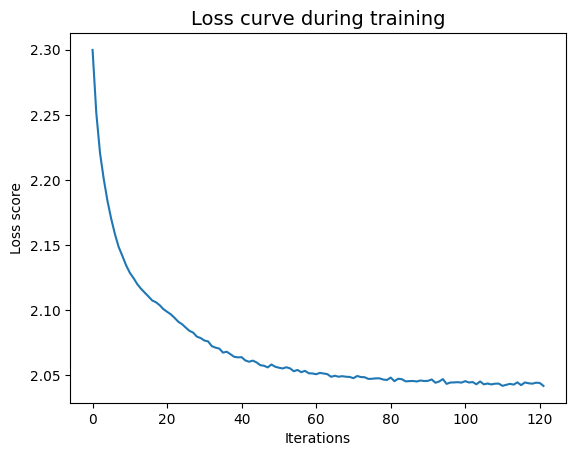

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(classifierMLP.loss_curve_)
plt.title("Loss curve during training", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()
plt.savefig("../out/loss_curve.png")